In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Reshape,BatchNormalization

In [2]:
(x_train, y_train), (x_test, y_test) =tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

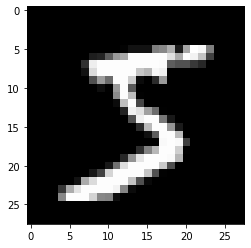

In [7]:
plt.imshow(x_train[0],cmap="gray")

In [8]:
x_train.dtype

dtype('uint8')

In [9]:
y_train.dtype

dtype('uint8')

In [10]:
x_train=x_train.astype("float32")
y_train=y_train.astype("float32")
x_test=x_test.astype("float32")
y_test=y_test.astype("float32")

In [11]:
x_train.dtype

dtype('float32')

In [12]:
type(x_train)

numpy.ndarray

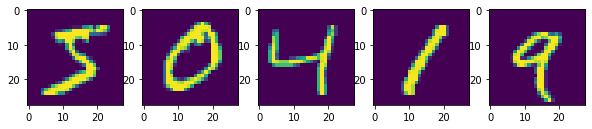

array([5., 0., 4., 1., 9.], dtype=float32)

In [13]:
plt.figure(figsize=(10,20))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_train[i])

plt.show()
y_train[0:5]

In [14]:
classes=np.unique(y_train).size
classes

10

In [15]:
y_train=np_utils.to_categorical(y_train,num_classes=classes)
y_test=np_utils.to_categorical(y_test,num_classes=classes)

In [16]:
y_train.shape

(60000, 10)

In [17]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
tf.keras.backend.clear_session()
model=Sequential()

model.add(Reshape((784,),input_shape=(28,28,)))
model.add(BatchNormalization())
model.add(Dense(10,activation="softmax"))
model.compile(optimizer="adam",metrics=["accuracy"],loss="categorical_crossentropy")

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [19]:
model.fit(x_train,y_train,epochs=20,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 0.4107 - accuracy: 0.8782 - val_loss: 0.5114 - val_accuracy: 0.9086
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3286 - accuracy: 0.9064 - val_loss: 0.5434 - val_accuracy: 0.9162
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3183 - accuracy: 0.9106 - val_loss: 0.5716 - val_accuracy: 0.9144
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3122 - accuracy: 0.9115 - val_loss: 0.5425 - val_accuracy: 0.9164
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3085 - accuracy: 0.9116 - val_loss: 0.5515 - val_accuracy: 0.9148
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3087 - accuracy: 0.9120 - val_loss: 0.6752 - val_accuracy: 0.9137
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3049 - accuracy: 0.9142 - val_loss: 0.5034 - val_accuracy:

In [20]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.8341 - accuracy: 0.9120


[0.8340694308280945, 0.9120000004768372]

In [21]:
y_pred=model.predict(x_test)
y_pred

array([[7.9109930e-07, 9.2062807e-12, 4.1366191e-05, ..., 9.9744511e-01,
        8.1406015e-06, 2.8246458e-04],
       [2.8963837e-01, 2.7521081e-02, 6.3740677e-01, ..., 9.4311105e-18,
        6.1765778e-13, 7.5523063e-19],
       [2.6548409e-07, 9.9629837e-01, 1.5919161e-03, ..., 7.7665265e-04,
        4.7775067e-04, 5.5082557e-05],
       ...,
       [1.1311561e-09, 1.9478986e-08, 1.7054795e-06, ..., 6.4227538e-04,
        3.5311624e-03, 1.0946055e-02],
       [1.0958928e-24, 2.2585564e-12, 6.0359842e-12, ..., 1.8247066e-16,
        1.6709694e-06, 9.2852984e-18],
       [3.0942366e-09, 1.0119409e-11, 1.6826981e-06, ..., 1.0288634e-07,
        4.8643398e-07, 9.3702983e-09]], dtype=float32)

In [22]:
y_pred[0]

array([7.9109930e-07, 9.2062807e-12, 4.1366191e-05, 2.2072967e-03,
       2.0270971e-07, 1.4715751e-05, 1.6830574e-08, 9.9744511e-01,
       8.1406015e-06, 2.8246458e-04], dtype=float32)

In [23]:
np.argmax(y_pred[0])

7

In [24]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [25]:
np.argmax(y_test[0])

7

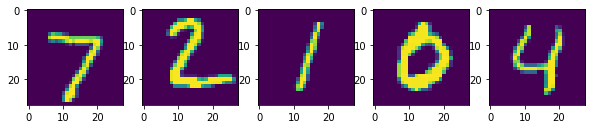

Actual values:  [7, 2, 1, 0, 4]
Predicted values:  [7, 2, 1, 0, 4]


In [26]:
my_prediction=[]
actual_prediction=[]
plt.figure(figsize=(10,20))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.imshow(x_test[i])
  my_prediction.append(np.argmax(y_pred[i]))
  actual_prediction.append(np.argmax(y_test[i]))

plt.show()
print("Actual values: ",actual_prediction)
print("Predicted values: ",my_prediction)